<a href="https://colab.research.google.com/github/GouravCh01/Encryptix/blob/main/Movie_Rating_Prediction_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the dataset
#Reading the csv file

In [ ]:
dataframe=pd.read_csv("IMDbMoviesIndia.csv", encoding='latin-1')
dataframe.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
dataframe.describe()
#dataframe.describe() generates descriptive statistics of the DataFrame. It summarizes central tendency, dispersion and shape of the dataset’s distribution, excluding NaN values.

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
dataframe.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
dataframe.dropna(subset=["Rating",'Actor 1','Actor 2','Actor 3','Director','Genre'], inplace=True)
#dataframe.dropna(subset=[...], inplace=True):
#dropna is used to remove rows with missing values.
#subset=[...] specifies the columns to check for missing values: 'Rating', 'Actor 1', 'Actor 2', 'Actor 3', 'Director', and 'Genre'.
#inplace=True modifies the DataFrame directly without creating a copy.

In [ ]:
dataframe.isnull().sum()
#dataframe.isnull().sum() counts the number of missing (null) values in each column of the DataFrame.

,0
Name,0
Year,0
Duration,1899
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
dataframe.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
dataframe['Votes'] = dataframe['Votes'].str.replace(',','').astype(int)
#dataframe['votes'].str.replace(',', ''): Removes commas from the 'votes' column
#.astype(int): Converts the 'votes' column to integer data type after removing the commas, allowing for numerical operations.

In [ ]:
dataframe['Year']=dataframe['Year'].str.strip('()').astype(int)
#dataframe['year'].str.strip('()'): Removes the opening and closing parentheses from the 'year' column.
#astype(int): Converts the 'year' column to integer data type.

In [ ]:
dataframe['Duration']=dataframe['Duration'].str.strip('min')
#dataframe['Duration'].str.strip('min'): Removes the 'min' suffix from the 'Duration' column.

In [ ]:
dataframe['Duration'].fillna(dataframe['Duration'].median(),inplace=True)
#dataframe['duration'].fillna(dataframe['Duration'].median(), inplace=True): Fills missing values in the 'duration' column with the median value of the 'Duration' column.
#inplace=True modifies the DataFrame directly without creating a copy.

In [ ]:
dataframe.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int64  
 2   Duration  7558 non-null   object 
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 649.5+ KB


In [ ]:

dataframe.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
GM = dataframe.loc[dataframe['Rating'].sort_values(ascending=False)[:10].index]
GM

#This code selects the top 10 highest rated movies in your DataFrame.
#dataframe['Rating'].sort_values(ascending=False): Sorts the DataFrame by the 'Rating' column in descending order (highest rating first).
#[:10]: Selects the first 10 rows (top 10 highest rated movies).
#.index: Extracts the row indices of these top 10 movies.
#dataframe.loc[...]: Uses the extracted indices to select the corresponding rows from the original DataFrame and assigns them to the variable GM.


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,135.0,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
5125,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi


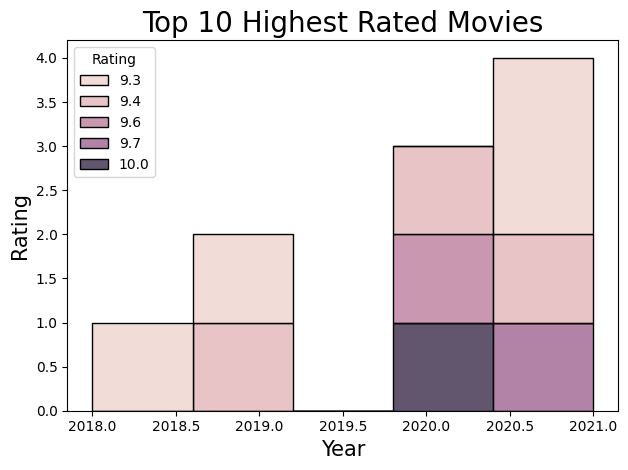

In [ ]:
sns.histplot(data=GM,x="Year", hue="Rating", multiple="stack")
#sns.histplot(data=GM, x="Year", hue="Rating", multiple="stack"):
#Creates a histogram using Seaborn's histplot function.
#data=GM specifies the DataFrame to use (the top 10 movies).
#x="Year" sets the x-axis to represent the release year.
#hue="Rating" colors the bars based on the movie's rating.
#multiple="stack" stacks bars with the same year on top of each other for better comparison.


plt.title('Top 10 Highest Rated Movies',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Rating',fontsize=15)
#plt.title(...), plt.xlabel(...), plt.ylabel(...):
#Sets the title and labels for the plot, enhancing readability.




plt.tight_layout()
#plt.tight_layout(): Adjusts the plot layout to prevent overlapping elements.




plt.show()
#Display the histogram output.

In [ ]:
gen_count = dataframe['Genre'].value_counts().reset_index()
gen_count.columns = ['Genre', 'Count']
top_genres = gen_count.head(5)
top_genres

,Genre,Count
0,Drama,1137
1,"Drama, Romance",443
2,"Action, Crime, Drama",417
3,Action,391
4,"Drama, Family",291


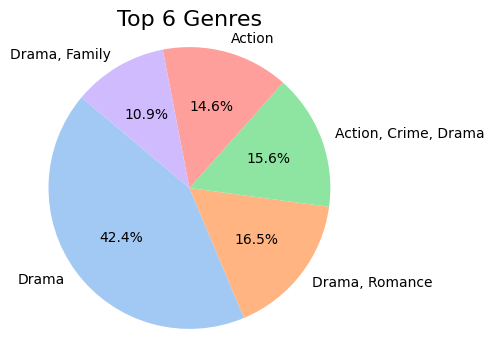

In [ ]:
plt.figure(figsize=(4, 4))
#plt.figure(figsize=(4, 4)): Sets the size of the figure to create a square pie chart.


plt.pie(top_genres['Count'], labels=top_genres['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
#plt.pie(...): Creates the pie chart using Matplotlib's pie function.
#top_genres['Count'] provides the data for the size of each pie slice (count of each genre).
#labels=top_genres['Genre'] sets the labels for each slice.
#autopct='%1.1f%%' formats the percentage labels displayed on each slice.
#startangle=140 sets the starting angle for the first slice.
#colors=sns.color_palette('pastel') uses a pastel color palette from Seaborn.



plt.title('Top 6 Genres', fontsize=16)
#plt.title(...): Sets the title for the pie chart.


plt.axis('equal')
#plt.axis('equal'): Ensures that the pie chart is drawn as a circle.


plt.show()
#plt.show(): Displays the generated pie chart.

In [ ]:
director_avg_rating_count = dataframe.groupby('Director')['Rating'].mean().reset_index()
#Groups the DataFrame by the 'Director' column.
#Calculates the mean rating for each director.
#Resets the index to create a new DataFrame with 'Director' and 'Rating' columns.


director_avg_rating_count = director_avg_rating_count.sort_values(by='Rating',ascending=False)
#Sorts the DataFrame director_avg_rating_count in descending order based on the 'Rating' column.


top_directors = director_avg_rating_count.head(6)
#Selects the top 6 rows (directors with the highest average ratings) and assigns them to top_directors.


top_directors
#display the output.

,Director,Rating
2243,Saif Ali Sayeed,10.0
2560,Sriram Raja,9.7
504,Bobby Kumar,9.6
322,Arvind Pratap,9.4
1513,Munni Pankaj,9.4
2598,Suhrud Godbole,9.4


<ipython-input-21-9114fc7b6c4f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Director', y='Rating', data=top_directors, palette='viridis')


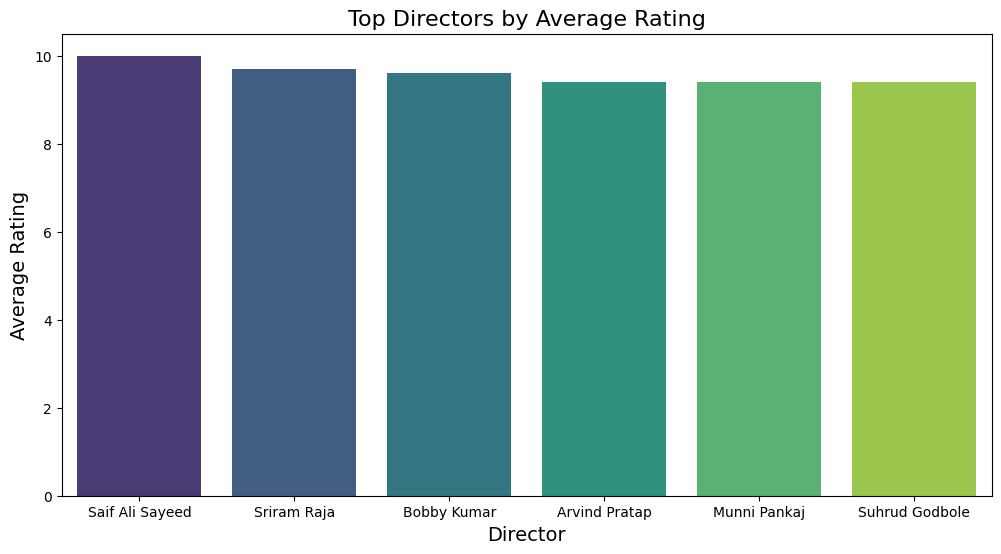

In [ ]:
plt.figure(figsize=(12, 6))
#Sets the size

sns.barplot(x='Director', y='Rating', data=top_directors, palette='viridis')
#Creates a bar plot using Seaborn

plt.title('Top Directors by Average Rating', fontsize=16)
#Sets the title

plt.xlabel('Director', fontsize=14)
#Sets the label for the x-axis

plt.ylabel('Average Rating', fontsize=14)
#Sets the label for the y-axis

plt.show()
#Displays the generated bar plot.

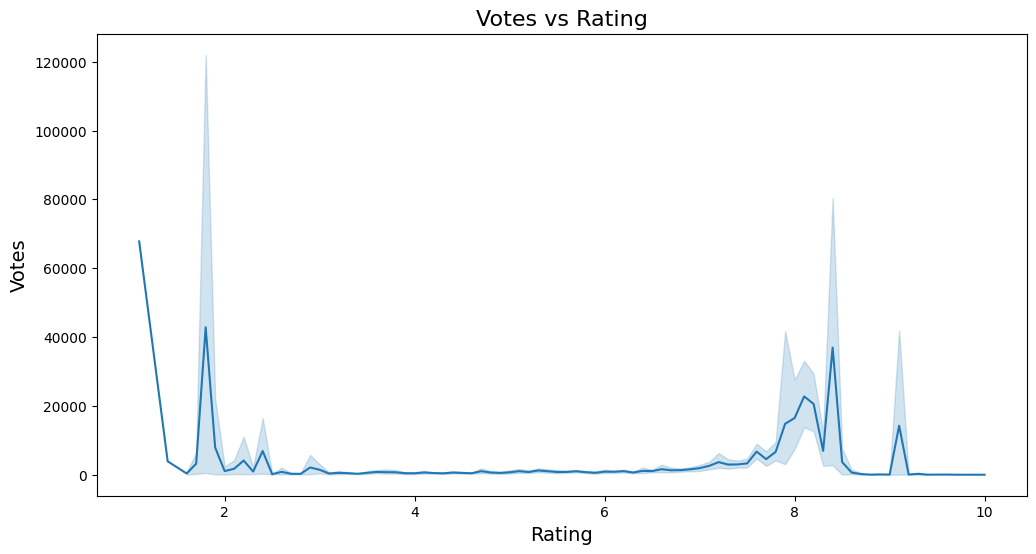

In [ ]:
plt.figure(figsize=(12, 6))
#Sets the size

sns.lineplot(data=dataframe, x='Rating', y='Votes')
#Creates a bar plot using Seaborn

plt.title('Votes vs Rating', fontsize=16)
#Sets the title

plt.xlabel('Rating', fontsize=14)
#Sets the label for the x-axis

plt.ylabel('Votes', fontsize=14)
#Sets the label for the y-axis

plt.show()
#Displays the generated bar plot.

In [ ]:
actor_count = dataframe['Actor 1'].value_counts().reset_index()
#Counts the occurrences of each unique actor in the 'Actor 1' column.


actor_count.columns = ['Actor', 'MovieCount']
#Assigns the list ['Actor', 'MovieCount'] as the new column names for the DataFrame.
#The first column, previously named 'index', is now renamed to 'Actor'.
#The second column, which contained the counts, is now renamed to 'MovieCount'.
top_actors = actor_count.head(6)

top_actors
#display the data.

,Actor,MovieCount
0,Jeetendra,140
1,Dharmendra,134
2,Mithun Chakraborty,130
3,Ashok Kumar,125
4,Rajesh Khanna,118
5,Amitabh Bachchan,116


<ipython-input-24-c8ef4580d5b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_actors, x='MovieCount', y='Actor', palette='viridis')


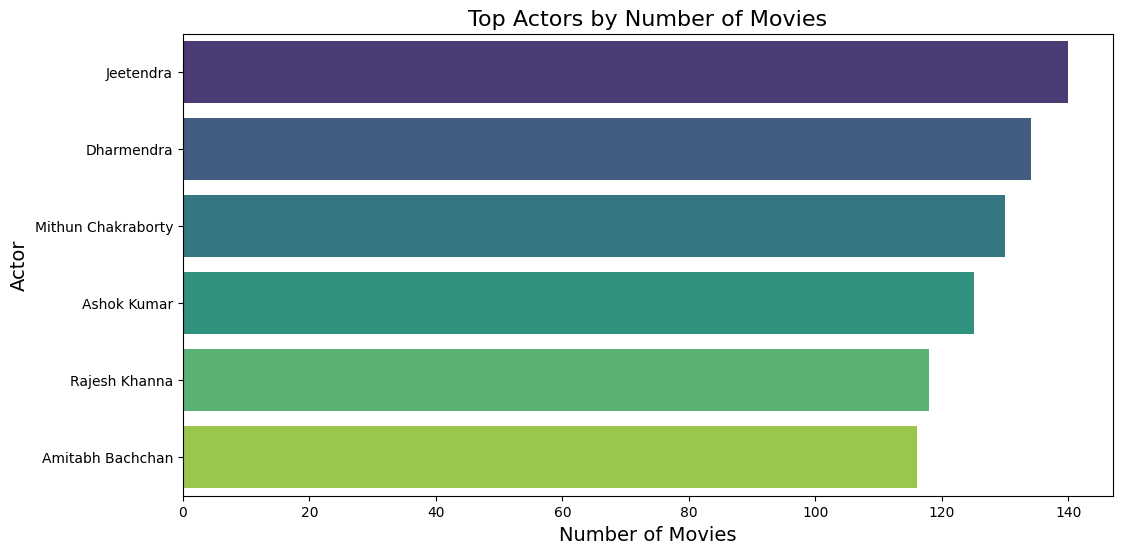

In [ ]:
plt.figure(figsize=(12, 6))
#Sets the size

sns.barplot(data=top_actors, x='MovieCount', y='Actor', palette='viridis')
#Creates a bar plot using Seaborn

plt.title('Top Actors by Number of Movies', fontsize=16)
#Sets the title

plt.xlabel('Number of Movies', fontsize=14)
#Sets the label for the x-axis

plt.ylabel('Actor', fontsize=14)
#Sets the label for the y-axis

plt.show()
#Displays the generated bar plot.


In [ ]:
yearly_movie_count = dataframe['Year'].value_counts().reset_index()
#Counts the occurrences of each unique year in the 'year' column.

yearly_movie_count.columns = ['Year', 'MovieCount']
#Assigns the list ['Year', 'MovieCount'] as the new column names for the DataFrame.
#The first column, previously named 'index', is now renamed to 'Year'.
#The second column, which contained the counts, is now renamed to 'MovieCount'.

yearly_movie_count = yearly_movie_count.sort_values(by='Year')
#Sorts the DataFrame yearly_movie_count in ascending order based on the 'Year' column.

yearly_movie_count

,Year,MovieCount
91,1917,1
88,1931,3
89,1932,2
86,1933,4
90,1934,2
...,...,...
1,2017,223
2,2018,214
0,2019,238
9,2020,157


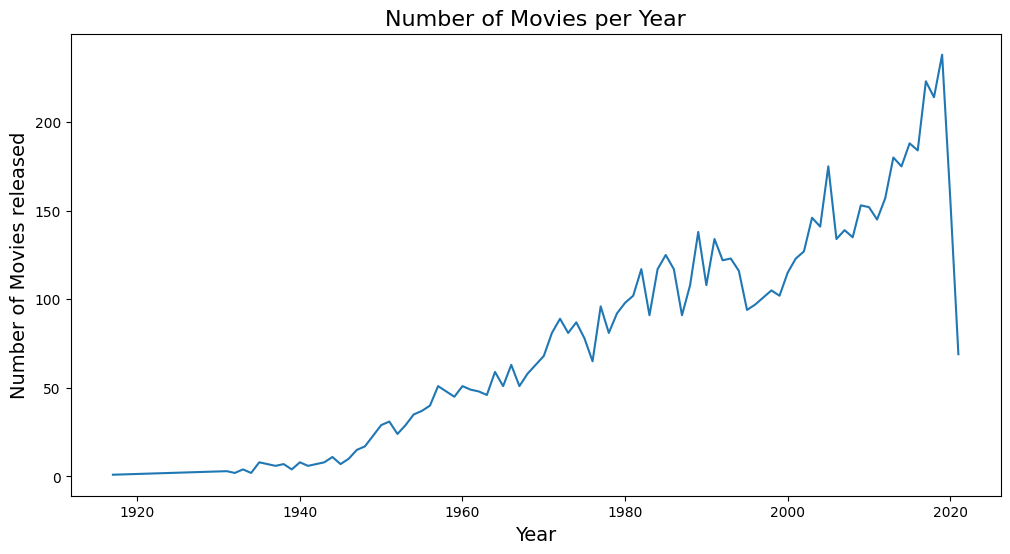

In [ ]:
plt.figure(figsize=(12, 6))
#Sets the size

sns.lineplot(data=yearly_movie_count, x='Year', y='MovieCount')
#Creates a line plot using Sea

plt.title('Number of Movies per Year', fontsize=16)
#Sets the title

plt.xlabel('Year', fontsize=14)
#Sets the label for the x-axis

plt.ylabel('Number of Movies released', fontsize=14)
#Sets the label for the y-axis

plt.show()
#Displays the generated line plot.

In [ ]:
filtered_dataframe = dataframe[(dataframe['Rating']>8) & (dataframe['Votes']>10000)]
filtered_dataframe

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
173,A Wednesday,2008,104,"Action, Crime, Drama",8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
981,Anand,1971,122,"Drama, Musical",8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal
1009,Andaz Apna Apna,1994,160,"Action, Comedy, Romance",8.1,50810,Rajkumar Santoshi,Aamir Khan,Salman Khan,Raveena Tandon
1019,Andhadhun,2018,139,"Crime, Drama, Music",8.2,77901,Sriram Raghavan,Ayushmann Khurrana,Tabu,Radhika Apte
1285,Article 15,2019,130,"Crime, Drama, Mystery",8.2,25706,Anubhav Sinha,Ayushmann Khurrana,Nassar,Manoj Pahwa
1877,Barfi!,2012,151,"Comedy, Drama, Romance",8.1,77377,Anurag Basu,Ranbir Kapoor,Priyanka Chopra Jonas,Ileana D'Cruz
2065,Bhaag Milkha Bhaag,2013,186,"Biography, Drama, Sport",8.2,62636,Rakeysh Omprakash Mehra,Farhan Akhtar,Sonam Kapoor,Pawan Malhotra
2412,Black,2005,122,Drama,8.2,33782,Sanjay Leela Bhansali,Amitabh Bachchan,Rani Mukerji,Shernaz Patel
2425,Black Friday,2004,143,"Action, Crime, Drama",8.5,19493,Anurag Kashyap,Kay Kay Menon,Pawan Malhotra,Aditya Srivastav


<ipython-input-28-73e2c3996126>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


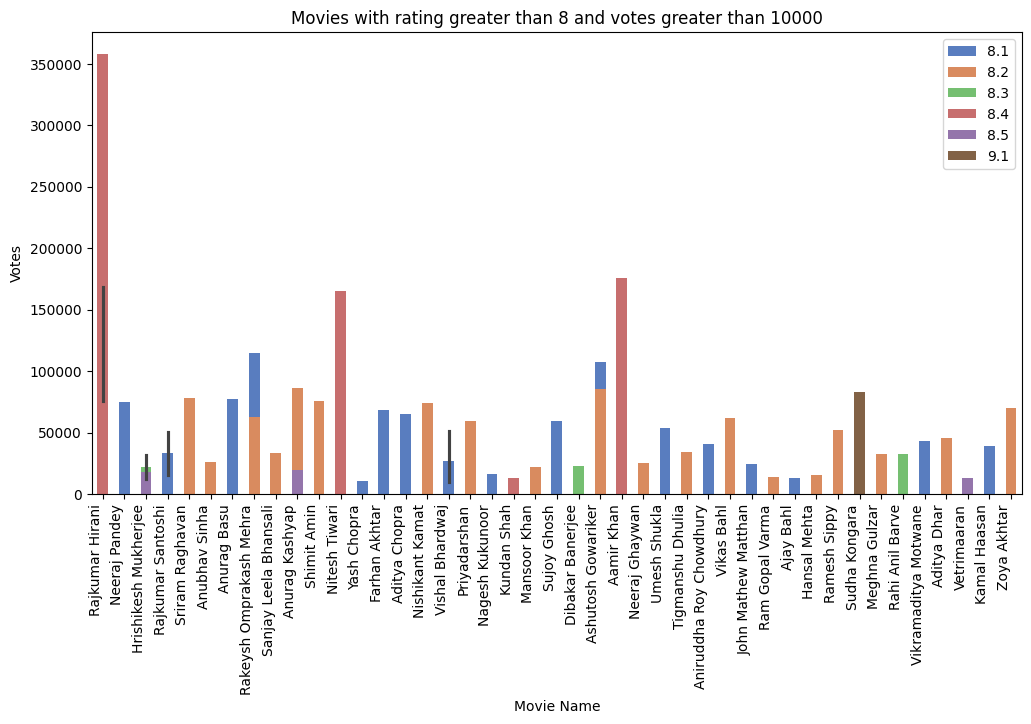

In [ ]:
plt.figure(figsize=(12, 6))
#Sets the size

ax= sns.barplot(data=filtered_dataframe, x='Director', y='Votes', hue='Rating', dodge=False, width=0.5, palette='muted')
#Creates a bar plot using Seaborn

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


ax.legend(loc='upper right')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Votes')
ax.set_title('Movies with rating greater than 8 and votes greater than 10000')


plt.show()

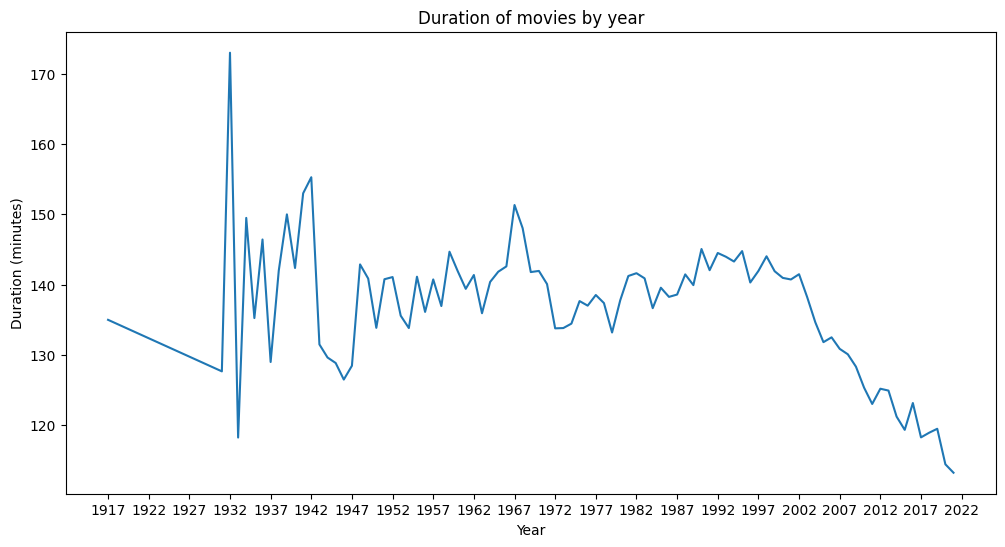

In [ ]:
dataframe['Duration'] = dataframe['Duration'].astype(int)
dataframe['Year'] = dataframe['Year'].astype(int)


plt.figure(figsize=(12, 6))
#Sets the size

sns.lineplot(data=dataframe, x='Year', y='Duration', errorbar=None)
#Creates a line plot using Seaborn

plt.xlabel('Year')
#Sets the label for the x-axis

plt.ylabel('Duration (minutes)')
#Sets the label for the y-axis

plt.title('Duration of movies by year')
#Sets the title

plt.xticks(np.arange (1917,2023,5))

plt.show()
#Displays the generated line plot.

In [ ]:
dataframe['Genre']=dataframe['Genre'].str.split(',')
genre_dataframe=dataframe.explode('Genre')
genre_dataframe

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,135,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


<ipython-input-31-d1b3c7b36af4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=genre_dataframe, x='Genre',order=genre_dataframe['Genre'].value_counts().index, palette='viridis')


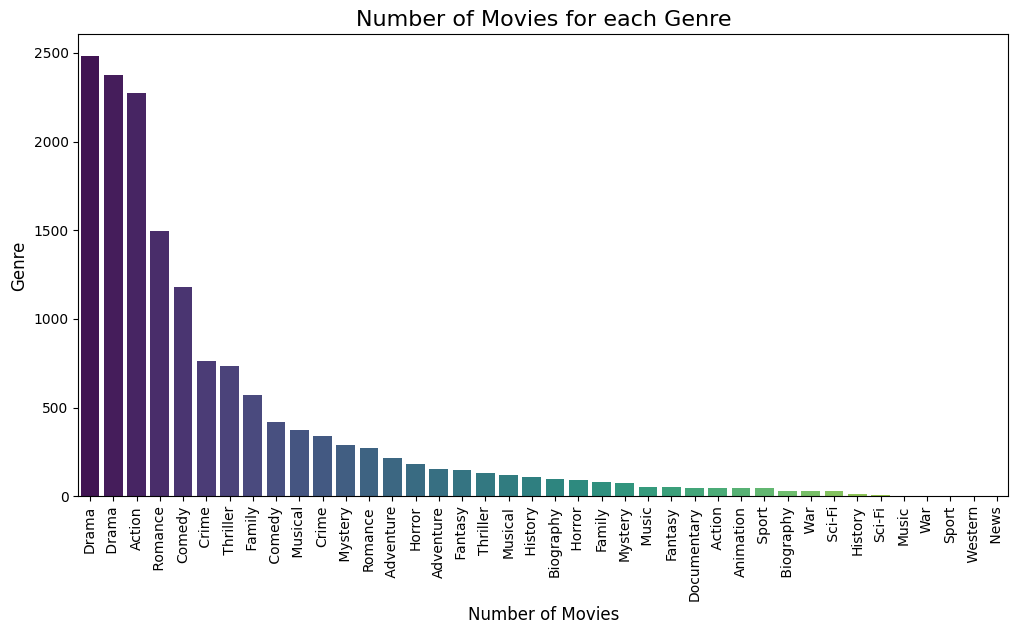

In [ ]:
plt.figure(figsize=(12, 6))
#Sets the size

sns.countplot(data=genre_dataframe, x='Genre',order=genre_dataframe['Genre'].value_counts().index, palette='viridis')
#Creates a count plot using Sea


plt.title('Number of Movies for each Genre', fontsize=16)
#Sets the title

plt.xlabel('Number of Movies', fontsize=12)
#Sets the label for the x-axis

plt.ylabel('Genre', fontsize=12)
#Sets the label for the y-axis


plt.xticks(rotation=90)
#Rotates the x-axis labels for better readability


plt.show()
#Displays the generated count plot.

In [ ]:
avg_ratingbygenre = genre_dataframe.groupby('Genre')['Rating'].mean().reset_index()
avg_ratingbygenre = avg_ratingbygenre.sort_values(by='Rating', ascending=False)
avg_ratingbygenre

,Genre,Rating
13,News,8.000000
26,Documentary,7.587755
32,Music,7.250000
2,Biography,6.845161
8,History,6.825234
23,Biography,6.676289
30,History,6.630769
36,Sci-Fi,6.460000
16,Sport,6.406667
29,Fantasy,6.246154


<ipython-input-33-28396f3fe05d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_ratingbygenre, x='Genre', y='Rating', palette='viridis')


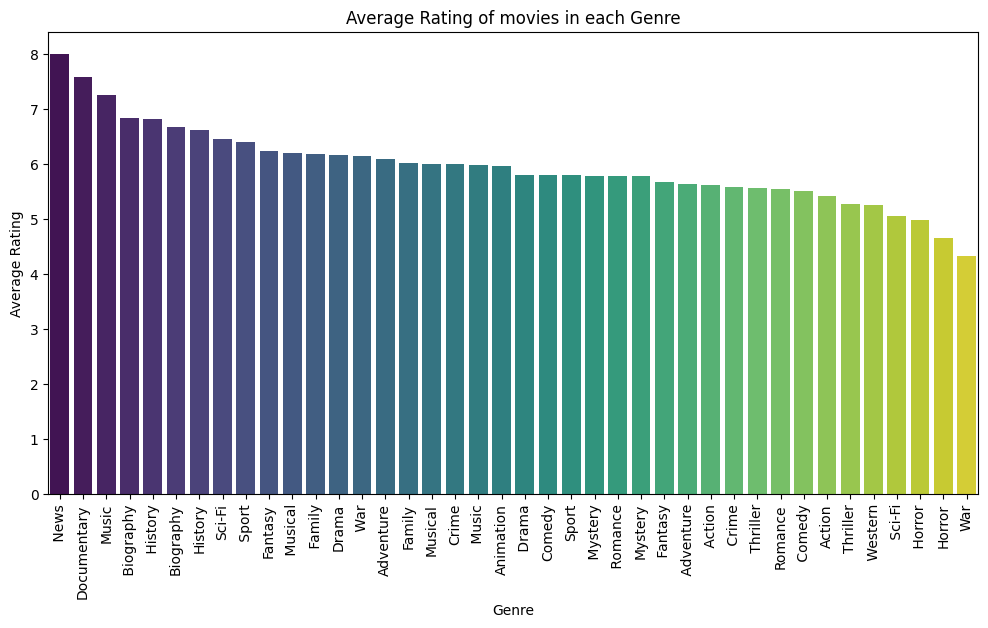

In [ ]:
plt.figure(figsize=(12, 6))
#Sets the size

sns.barplot(data=avg_ratingbygenre, x='Genre', y='Rating', palette='viridis')
#Creates a bar plot using Sea

plt.title('Average Rating of movies in each Genre')
#Sets the title

plt.xlabel('Genre')
#Sets the label for the x-axis

plt.ylabel('Average Rating')
#Sets the label for the y-axis

plt.xticks(rotation=90)
#Rotates the x-axis labels for better readability

plt.show()
#Displays the generated bar plot.

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


trans_dataframe = dataframe.drop(['Name'],axis=1)

trans_dataframe['Director'] = labelencoder.fit_transform(dataframe['Director'])


trans_dataframe['Actor 1'] = labelencoder.fit_transform(dataframe['Actor 1'])
trans_dataframe['Actor 2'] = labelencoder.fit_transform(dataframe['Actor 2'])
trans_dataframe['Actor 3'] = labelencoder.fit_transform(dataframe['Actor 3'])

trans_dataframe['Genre'] = labelencoder.fit_transform(dataframe['Genre'].apply(lambda x: ', '.join(x)))

trans_dataframe.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,252,7.0,8,755,1686,2725,373
3,2019,110,205,4.4,35,1637,1500,865,2543
5,1997,147,175,4.7,827,1881,481,84,2422
6,2005,142,315,7.4,1086,2486,878,1346,2996
8,2012,82,351,5.6,326,161,2385,1416,1189


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

sc_data = scaler.fit_transform(trans_dataframe)
sc_dataframe = pd.DataFrame(sc_data, columns=trans_dataframe.columns)
sc_dataframe.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.980769,0.293333,0.607229,0.662921,0.000005,0.255499,0.698426,0.979511,0.123102
1,0.980769,0.296667,0.493976,0.370787,0.000051,0.553976,0.621375,0.310927,0.839274
2,0.769231,0.420000,0.421687,0.404494,0.001390,0.636548,0.199254,0.030194,0.799340
3,0.846154,0.403333,0.759036,0.707865,0.001828,0.841286,0.363712,0.483825,0.988779
4,0.913462,0.203333,0.845783,0.505618,0.000543,0.054484,0.987987,0.508986,0.392409


In [ ]:
corr_dataframe= trans_dataframe.corr(numeric_only=True)
corr_dataframe['Rating'].sort_values(ascending=False)

,Rating
Rating,1.000000
Votes,0.134655
Genre,0.122565
Actor 2,0.038852
Actor 3,0.031550
Actor 1,0.025089
Duration,-0.001801
Director,-0.003678
Year,-0.194990


<Axes: >

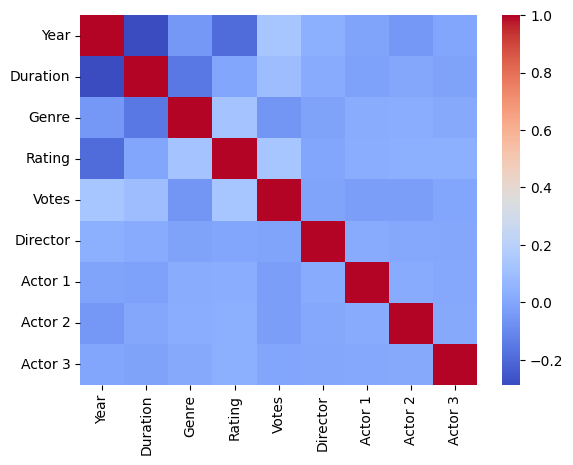

In [ ]:
sns.heatmap(corr_dataframe, annot=False, cmap='coolwarm')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
X = trans_dataframe.drop('Rating', axis=1)
Y = trans_dataframe['Rating']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
LinearRegression()

#In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

LinearRegression()

In [ ]:
X_test = np.array(X_test)
Y_pred = model.predict(X_test)
Y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.38173569, 6.27438422, 6.24148256, ..., 5.6990634 , 6.25823896,
       6.09526622])

In [ ]:
print('R2 Score: ', r2_score(Y_test, Y_pred))
print('Mean Squared Error: ', mean_squared_error(Y_test, Y_pred))
print('Mean Absolute Error: ', mean_absolute_error(Y_test, Y_pred))

R2 Score:  0.0848334767203478
Mean Squared Error:  1.6972873264362005
Mean Absolute Error:  1.0286370452288052
